In [1]:
import torch, os

In [7]:
model_path = './exp/sample/final.pt'

In [8]:
model = torch.load(model_path)

In [25]:
def L2(a, b):
    return torch.linalg.norm(a - b)

In [10]:
import torchvision.transforms as T
transform = T.Compose([T.Resize((224, 224)),
                       lambda x : x/255.0,
                       T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

In [20]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
def detect(model, transform, path, device='cpu'):
    model.eval()
    model.to(device)
    with torch.no_grad():
        t = read_image(path)
        img = t.cpu().numpy()
        plt.imshow(img.transpose(1, 2, 0))
        plt.axis('off')
        plt.show()
        t = transform(torch.unsqueeze(t, 0))
        t.to(device)
        return model(t)

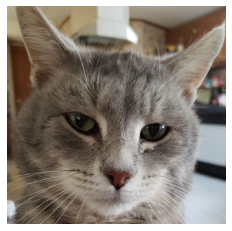

In [29]:
e1 = detect(model, transform, './data/train/0/1.jpg')

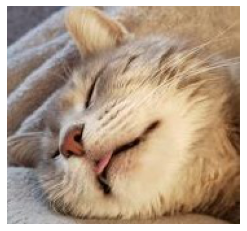

In [30]:
e2 = detect(model, transform, './data/train/0/2.jpg')

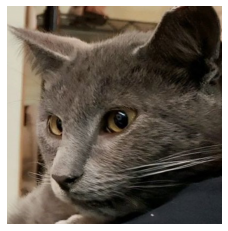

In [31]:
f1 = detect(model, transform, './data/train/1/1.jpg')

In [32]:
L2(e1, e2)

tensor(0.5231)

In [27]:
L2(e1, f1)

tensor(1.6605)

In [28]:
L2(e2, f1)

tensor(1.6451)

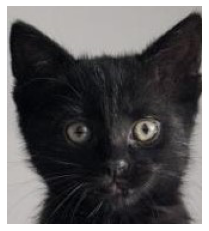

In [34]:
t1 = detect(model, transform, './data/test/0_1.jpg')

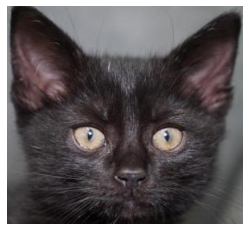

In [35]:
t2 = detect(model, transform, './data/test/0_2.jpg')

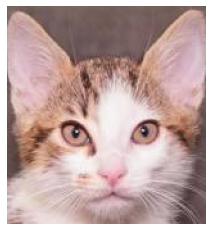

In [36]:
j1 = detect(model, transform, './data/test/1_1.jpg')

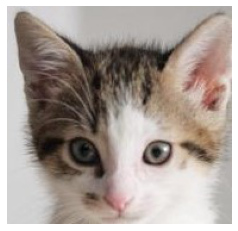

In [37]:
j2 = detect(model, transform, './data/test/1_2.jpg')

In [42]:
L2(t2, t1)

tensor(0.9147)

In [43]:
L2(j1, t2)

tensor(1.2282)

In [44]:
L2(j1, j2)

tensor(0.7799)